In [1]:
import os
import pandas as pd
import requests

In [2]:
# Define la URL del archivo CSV y el nombre del archivo local
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv"
nombre_archivo = "datos.csv"

# Verifica si el archivo ya existe localmente
if not os.path.exists(nombre_archivo):
    print("El archivo no existe localmente. Descargando...")
    # Descarga el archivo
    response = requests.get(url)
    # Guarda el archivo si la solicitud fue exitosa
    if response.status_code == 200:
        with open(nombre_archivo, 'wb') as f:
            f.write(response.content)
        print(f"Archivo descargado y guardado como {nombre_archivo}")
    else:
        print("Error al descargar el archivo. Verifica la URL.")
else:
    print("El archivo ya existe localmente. Usando el archivo existente.")

# Carga el archivo CSV en un DataFrame de pandas
try:
    df = pd.read_csv(nombre_archivo)
    print("Archivo CSV cargado exitosamente en un DataFrame.")
except Exception as e:
    print(f"Error al leer el archivo CSV: {e}")

# Muestra las primeras filas del DataFrame
df.head()

El archivo ya existe localmente. Usando el archivo existente.
Archivo CSV cargado exitosamente en un DataFrame.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.dtypes)
print(df.date[1])


id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
20141209T000000


In [4]:

# Convierte la columna 'date' a un formato datetime que pandas reconozca
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Encuentra la fecha más antigua en la columna 'date'
fecha_mas_antigua = df['date'].min()
anho_minimo = fecha_mas_antigua.year

# Calcula el número de días desde la fecha más antigua
df['date_as_integer'] = (df['date'] - fecha_mas_antigua).dt.days

# Restar el año mínimo a 'yr_built' y 'yr_renovated' para obtener los años relativos
df['yr_built_relative'] = df['yr_built'] - anho_minimo
df['yr_renovated_relative'] = df['yr_renovated'] - anho_minimo

# Si 'yr_renovated' es 0, reemplazar 'yr_renovated_relative' con 'yr_built_relative'
df.loc[df['yr_renovated'] == 0, 'yr_renovated_relative'] = 0
df.loc[df['yr_renovated'] != 0, 'yr_renovated_relative'] = 1

# Muestra las primeras filas para verificar el resultado
print(f"Año mínimo: {anho_minimo}")
print(df[['yr_built', 'yr_built_relative', 'yr_renovated', 'yr_renovated_relative']].head(10))

Año mínimo: 2014
   yr_built  yr_built_relative  yr_renovated  yr_renovated_relative
0      1955                -59             0                      0
1      1951                -63          1991                      1
2      1933                -81             0                      0
3      1965                -49             0                      0
4      1987                -27             0                      0
5      2001                -13             0                      0
6      1995                -19             0                      0
7      1963                -51             0                      0
8      1960                -54             0                      0
9      2003                -11             0                      0


In [5]:
columnas_a_eliminar = ['date', 'yr_built','yr_renovated','id']

# Crea un nuevo DataFrame sin las columnas especificadas
data = df.drop(columns=columnas_a_eliminar)

# Muestra el nuevo DataFrame para verificar el resultado
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,date_as_integer,yr_built_relative,yr_renovated_relative
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,164,-59,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,221,-63,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,299,-81,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,221,-49,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,292,-27,0
5,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,98053,47.6561,-122.005,4760,101930,10,-13,0
6,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,98003,47.3097,-122.327,2238,6819,56,-19,0
7,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,98198,47.4095,-122.315,1650,9711,258,-51,0
8,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,98146,47.5123,-122.337,1780,8113,348,-54,0
9,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,98038,47.3684,-122.031,2390,7570,314,-11,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

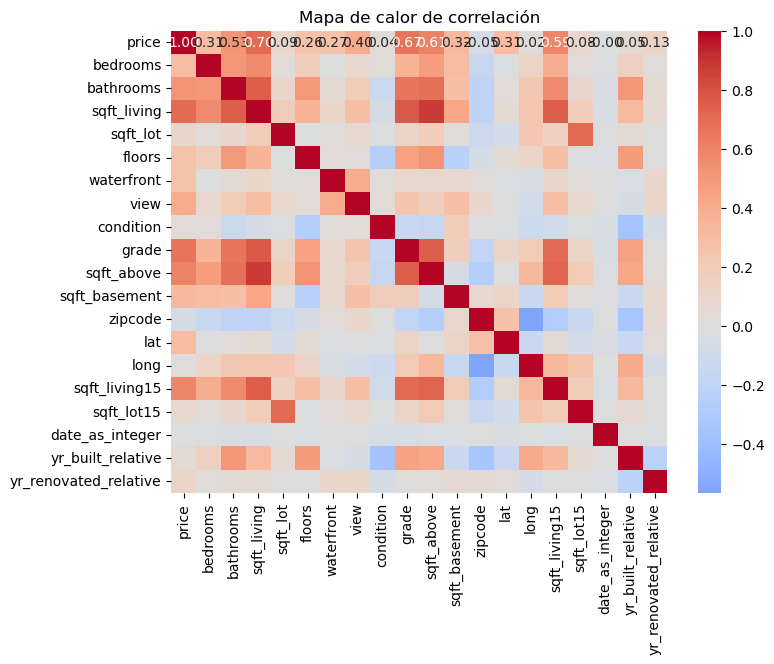

In [7]:
# Crear un heatmap de la matriz de correlación
correlacion = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlación')
plt.show()

In [8]:
import ipywidgets as widgets
from IPython.display import display

def crear_boxplot_interactivo(df):
    """
    Crea una visualización interactiva para seleccionar y mostrar boxplots
    de columnas específicas de un DataFrame.
    
    :param df: DataFrame de pandas con los datos.
    """
    # Crear un dropdown para seleccionar las columnas
    dropdown = widgets.SelectMultiple(
        options=df.columns,
        value=[df.columns[0]],  # Selecciona por defecto la primera columna
        description='Columnas:',
        disabled=False,
    )
    
    # Función para actualizar el gráfico cuando se seleccionan nuevas columnas
    def actualizar_boxplot(columnas):
        if not columnas:
            print("Por favor, selecciona al menos una columna.")
            return
        
        # Crear el boxplot de las columnas seleccionadas
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[list(columnas)])
        plt.title('Boxplots de las columnas seleccionadas')
        plt.xticks(rotation=45)  # Rotar etiquetas de las columnas si es necesario
        plt.tight_layout()
        plt.show()
    
    # Crear un control interactivo para actualizar el gráfico al cambiar la selección
    interactivo = widgets.interactive(
        actualizar_boxplot,
        columnas=dropdown
    )
    
    display(interactivo)

In [9]:
crear_boxplot_interactivo(data)

interactive(children=(SelectMultiple(description='Columnas:', index=(0,), options=('price', 'bedrooms', 'bathr…

In [10]:
data_log=data.copy()
data_log['price_log'] = np.log(data['price'] + 1)
data_log['sqft_living_log'] = np.log(data['sqft_living'] + 1)
data_log['sqft_lot_log'] = np.log(data['sqft_lot'] + 1)
data_log['sqft_above_log'] = np.log(data['sqft_above'] + 1)
data_log['sqft_basement_log'] = np.log(data['sqft_basement'] + 1)
data_log['sqft_living15_log'] = np.log(data['sqft_living15'] + 1)
data_log['sqft_lot15_log'] = np.log(data['sqft_lot15'] + 1)
data_log=data_log.drop(columns=['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15'])
crear_boxplot_interactivo(data_log)

interactive(children=(SelectMultiple(description='Columnas:', index=(0,), options=('bedrooms', 'bathrooms', 'f…

In [11]:
from sklearn.model_selection import train_test_split

# Supongamos que 'df' es tu DataFrame y 'price' es la columna objetivo
X_log = data_log.drop(columns=['price_log'])
y_log = data_log['price_log']

# Dividir en 80% datos de entrenamiento y 20% de prueba
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [12]:
X = data.drop(columns=['price'])
y = data['price']

# Dividir en 80% datos de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
# Esto devuelve un array, por lo que lo convertimos de nuevo a DataFrame
data_normalizado = pd.DataFrame(scaler.fit_transform(data_log), columns=data_log.columns)


In [14]:
X_norm = data.drop(columns=['price'])
y_norm = data['price']

# Dividir en 80% datos de entrenamiento y 20% de prueba
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

# Inicializar el modelo de regresión lineal
modelo_lin = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo_lin.fit(X_train, y_train)

# Predecir los precios en el conjunto de prueba
y_pred_lin = modelo_lin.predict(X_test)

r2 = r2_score(y_test, y_pred_lin)

print(f"Coeficiente de Determinación (R²): {r2}")

Coeficiente de Determinación (R²): 0.7023553713069507


In [16]:


# Inicializar el modelo de regresión lineal
modelo_lin_log = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo_lin_log.fit(X_train_log, y_train_log)

# Predecir los precios en el conjunto de prueba
y_pred_log = modelo_lin_log.predict(X_test_log)

r2 = r2_score(y_test_log, y_pred_log)

print(f"Coeficiente de Determinación (R²): {r2}")

Coeficiente de Determinación (R²): 0.7769000667904348


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Rango de valores para los hiperparámetros
n_estimators_range = [10, 20, 50, 100]  # Número de árboles
max_depth_range = [3, 5, 7, 10]  # Profundidad máxima de cada árbol

# Variables para almacenar el mejor modelo y su rendimiento
best_r2 = -np.inf  # Inicializamos con un valor muy bajo
best_model = None
best_params = {}

# Bucle anidado para probar todas las combinaciones de n_estimators y max_depth
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        # Crear y ajustar el modelo con la combinación actual de hiperparámetros
        modelo_gbm = GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=0.1,
            max_depth=max_depth,
            random_state=42
        )
        modelo_gbm.fit(X_train_norm, y_train_norm)

        # Predecir los precios en el conjunto de prueba
        y_pred = modelo_gbm.predict(X_test_norm)

        # Calcular el coeficiente de determinación (R²)
        r2 = r2_score(y_test_norm, y_pred)
        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, R²: {r2}")

        # Si el R² actual es mejor que el mejor encontrado hasta ahora, lo guardamos
        if r2 > best_r2:
            best_r2 = r2
            best_model = modelo_gbm
            best_params = {
                'n_estimators': n_estimators,
                'max_depth': max_depth
            }

# Mostrar los mejores hiperparámetros y el mejor R²
print(f"\nMejor R² obtenido: {best_r2}")
print(f"Mejores parámetros: n_estimators = {best_params['n_estimators']}, max_depth = {best_params['max_depth']}")


n_estimators: 10, max_depth: 3, R²: 0.6013586118145615
n_estimators: 10, max_depth: 5, R²: 0.6892737396585775
n_estimators: 10, max_depth: 7, R²: 0.7162492077408129
n_estimators: 10, max_depth: 10, R²: 0.7437695948779003
n_estimators: 20, max_depth: 3, R²: 0.7500813592736447
n_estimators: 20, max_depth: 5, R²: 0.8115492517057814
n_estimators: 20, max_depth: 7, R²: 0.8329025641080217
n_estimators: 20, max_depth: 10, R²: 0.8384178000190441
n_estimators: 50, max_depth: 3, R²: 0.833483485324449
n_estimators: 50, max_depth: 5, R²: 0.8628487799439614
n_estimators: 50, max_depth: 7, R²: 0.8685637006861675
n_estimators: 50, max_depth: 10, R²: 0.8523370634528482
n_estimators: 100, max_depth: 3, R²: 0.8554182556781281
n_estimators: 100, max_depth: 5, R²: 0.8694950263942824
n_estimators: 100, max_depth: 7, R²: 0.8743854417602914
n_estimators: 100, max_depth: 10, R²: 0.8548513240227691

Mejor R² obtenido: 0.8743854417602914
Mejores parámetros: n_estimators = 100, max_depth = 7



Mejor R² obtenido: 0.8347081812534235
Mejores parámetros: max_depth = 10


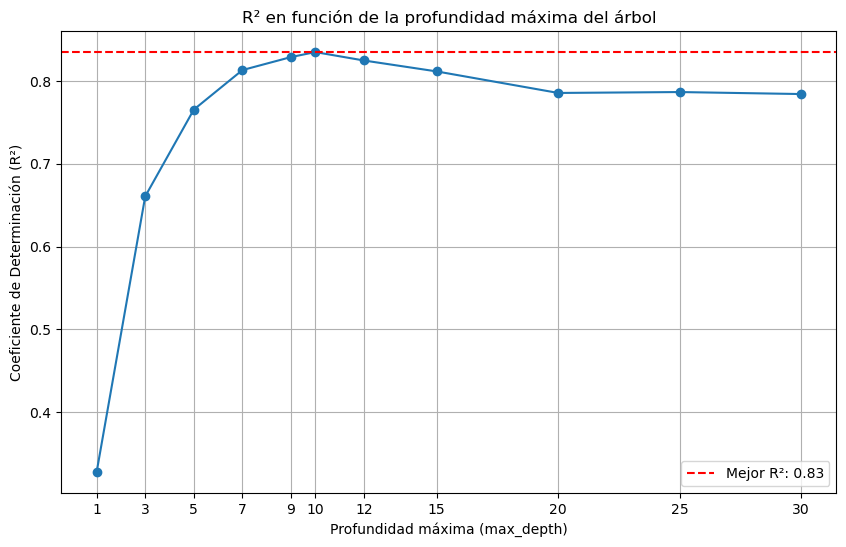

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Rango de valores para max_depth
max_depth_range = [1, 3, 5, 7, 9, 10, 12, 15, 20, 25, 30]  # Diferentes profundidades máximas

# Variables para almacenar el mejor modelo y su rendimiento
best_r2 = -np.inf  # Inicializamos con un valor muy bajo
best_model = None
best_params = {}
r2_scores = []  # Para almacenar los R²

# Bucle para probar diferentes valores de max_depth
for max_depth in max_depth_range:
    # Crear y ajustar el modelo de árbol de decisión
    modelo_arbol = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    modelo_arbol.fit(X_train_log, y_train_log)

    # Predecir los precios en el conjunto de prueba
    y_pred = modelo_arbol.predict(X_test_log)

    # Calcular el coeficiente de determinación (R²)
    r2 = r2_score(y_test_log, y_pred)
    r2_scores.append(r2)  # Guardar el R² en la lista
    #print(f"max_depth: {max_depth}, R²: {r2}")

    # Si el R² actual es mejor que el mejor encontrado hasta ahora, lo guardamos
    if r2 > best_r2:
        best_r2 = r2
        best_model = modelo_arbol
        best_params = {
            'max_depth': max_depth
        }

# Mostrar los mejores parámetros y el mejor R²
print(f"\nMejor R² obtenido: {best_r2}")
print(f"Mejores parámetros: max_depth = {best_params['max_depth']}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, r2_scores, marker='o', linestyle='-')
plt.title('R² en función de la profundidad máxima del árbol')
plt.xlabel('Profundidad máxima (max_depth)')
plt.ylabel('Coeficiente de Determinación (R²)')
plt.xticks(max_depth_range)
plt.grid()
plt.axhline(y=best_r2, color='r', linestyle='--', label=f'Mejor R²: {best_r2:.2f}')
plt.legend()
plt.show()

n_estimators: 5, R²: 0.8620674369343061
n_estimators: 10, R²: 0.8788272139545292
n_estimators: 20, R²: 0.8858294152707163
n_estimators: 30, R²: 0.8886826610748266
n_estimators: 40, R²: 0.8895548294834501
n_estimators: 50, R²: 0.8894310767277572

Mejor R² obtenido: 0.8895548294834501
Mejores parámetros: n_estimators = 40


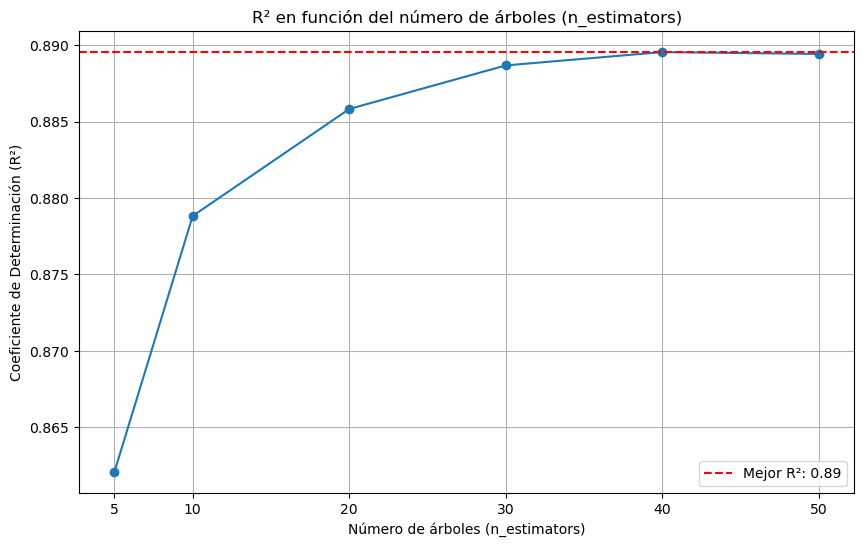

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Rango de valores para n_estimators
n_estimators_range = [5, 10, 20, 30, 40, 50]  # Diferentes números de árboles

# Variables para almacenar el mejor modelo y su rendimiento
best_r2 = -np.inf  # Inicializamos con un valor muy bajo
best_model = None
best_params = {}
r2_scores = []  # Para almacenar los R²

# Bucle para probar diferentes valores de n_estimators
for n_estimators in n_estimators_range:
    # Crear y ajustar el modelo de Random Forest
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_log, y_train_log)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test_log)

    # Calcular el coeficiente de determinación (R²)
    r2 = r2_score(y_test_log, y_pred)
    r2_scores.append(r2)  # Guardar el R² en la lista
    #print(f"n_estimators: {n_estimators}, R²: {r2}")

    # Si el R² actual es mejor que el mejor encontrado hasta ahora, lo guardamos
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_params = {
            'n_estimators': n_estimators
        }

# Mostrar los mejores parámetros y el mejor R²
print(f"\nMejor R² obtenido: {best_r2}")
print(f"Mejores parámetros: n_estimators = {best_params['n_estimators']}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-')
plt.title('R² en función del número de árboles (n_estimators)')
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Coeficiente de Determinación (R²)')
plt.xticks(n_estimators_range)
plt.grid()
plt.axhline(y=best_r2, color='r', linestyle='--', label=f'Mejor R²: {best_r2:.2f}')
plt.legend()
plt.show()


Mejor R² obtenido: 0.5235223952999835
Mejores parámetros: n_neighbors = 10


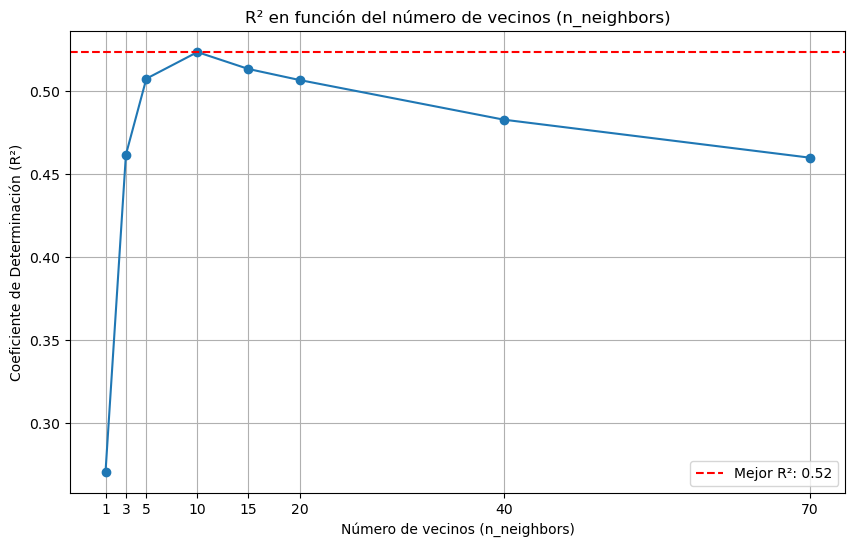

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# Rango de valores para n_neighbors
n_neighbors_range = [1, 3, 5, 10, 15, 20, 40, 70]  # Diferentes números de vecinos

# Variables para almacenar el mejor modelo y su rendimiento
best_r2 = -np.inf  # Inicializamos con un valor muy bajo
best_model = None
best_params = {}
r2_scores = []  # Para almacenar los R²

# Bucle para probar diferentes valores de n_neighbors
for n_neighbors in n_neighbors_range:
    # Crear y ajustar el modelo KNN
    modelo_knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    modelo_knn.fit(X_train_norm, y_train_norm)

    # Predecir en el conjunto de prueba
    y_pred = modelo_knn.predict(X_test_norm)

    # Calcular el coeficiente de determinación (R²)
    r2 = r2_score(y_test_norm, y_pred)
    r2_scores.append(r2)  # Guardar el R² en la lista
    #print(f"n_neighbors: {n_neighbors}, R²: {r2}")

    # Si el R² actual es mejor que el mejor encontrado hasta ahora, lo guardamos
    if r2 > best_r2:
        best_r2 = r2
        best_model = modelo_knn
        best_params = {
            'n_neighbors': n_neighbors
        }

# Mostrar los mejores parámetros y el mejor R²
print(f"\nMejor R² obtenido: {best_r2}")
print(f"Mejores parámetros: n_neighbors = {best_params['n_neighbors']}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, r2_scores, marker='o', linestyle='-')
plt.title('R² en función del número de vecinos (n_neighbors)')
plt.xlabel('Número de vecinos (n_neighbors)')
plt.ylabel('Coeficiente de Determinación (R²)')
plt.xticks(n_neighbors_range)
plt.grid()
plt.axhline(y=best_r2, color='r', linestyle='--', label=f'Mejor R²: {best_r2:.2f}')
plt.legend()
plt.show()